# Lab 4 - Regression Analysis

### Excercise - 1

What linear regression equation best predicts statistics performance for the students assuming we have following data? If a student made an 80 on the test, what grade would we expect him to make in  statistics? How well does the regression equation fit the data?

| Student | test_score | statistics_grade |
| --- | --- | --- |
| 1 | 95 | 85 |
| 2 | 85 | 95 |
| 3 | 80 | 70 |
| 4 | 70 | 65 |
| 5 | 60 | 70 |



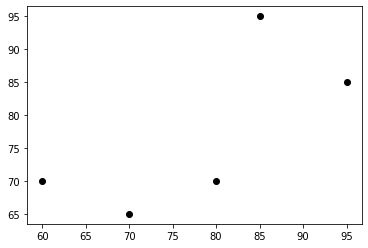

The expected grade for someone who got an 80 is 78.29.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('student_score.csv')

x = df['Xi']
y = df['Yi']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter(x, y,  color='black')
plt.show()

student_grade = slope*(80) + intercept 
print("The expected grade for someone who got an 80 is {}.".format(student_grade.round(2)))

**What linear regression equation best predicts statistics performance for the students assuming we have following data?**

y = .6438(80) + 26.781

**If a student made an 80 on the test, what grade would we expect him to make in  statistics?**

78.28 -> 78

**How well does the regression equation fit the data?**

Not very well as the r value we got is fairly low at 26.7.

### Excercise - 2

Plot linear regression line for the data given in Exercise-1 using matplotlib library


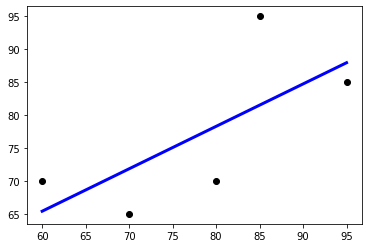

In [3]:
x = df.Xi.values.reshape(-1,1)
y = df.Yi.values.reshape(-1,1)

temp = linear_model.LinearRegression()
temp.fit(x,y)
plt.scatter(x, y,  color='black')
plt.plot(x,temp.predict(x), color='blue', linewidth=3)
plt.show()

### Excercise - 3

Measure the R-squared value, goodness-of-fit for Exercise-1 linear regression model

In [4]:
print("R-Value:{}".format((r_value**2).round(5)))


R-Value:0.48032


### Excercise - 4

Consider the following data:

Y: [16,4,1,9,1,25,16,4,0,9,25]

X: [-4,-2,1,3,-1,-5,4,2,0,-3,5]

**4.1) Visualize the scatter plot for the above data using matplotlib library**

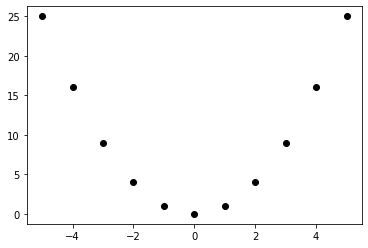

In [5]:
x = [-4,-2,1,3,-1,-5,4,2,0,-3,5]
y = [16,4,1,9,1,25,16,4,0,9,25]

plt.scatter(x, y,  color='black')
plt.show()

**4.2) What type of regression model is it?**

It is a polynomial linear regression model.

### Excercise - 5

#### Part 1

In [6]:
# Load and Display Raw Data
heartdisease = pd.read_csv('Dataset_heart-disease-dataset.csv')
print(heartdisease.head())
print(heartdisease.columns)

    age  sex   cp  tresbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0    145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0    160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0    120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0    130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0    130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  result  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
Index(['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'],
      dtype='object')


In [7]:
# Drop all rows that contain '?' and check the data feild for empty/null values
heartdisease.drop(heartdisease.index[heartdisease['ca'] == '?'], inplace = True)
heartdisease.drop(heartdisease.index[heartdisease['thal'] == '?'], inplace = True)
heartdisease['ca'] = heartdisease['ca'].astype(float)
heartdisease['thal'] = heartdisease['thal'].astype(float)
heartdisease.isnull().sum()
print("No column has empty/null values")


No column has empty/null values


<AxesSubplot:>

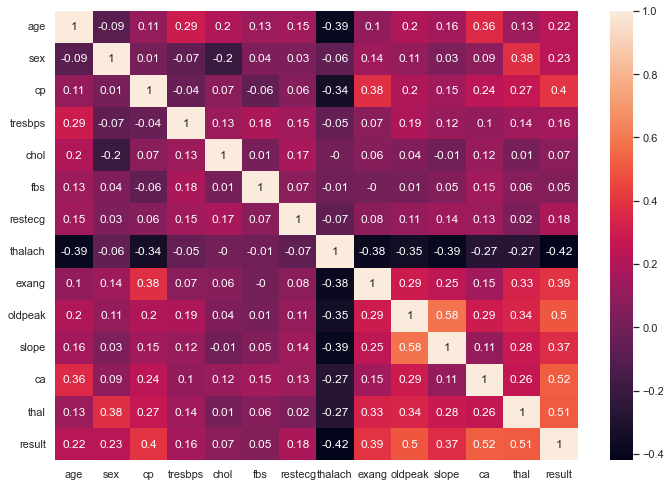

In [8]:
# Generate heatmap to understand the correlation between variables
correlation_matrix = heartdisease.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

The heatmaps show that the variable has a strong positive relation with 'ca'. Lets take 'ca' as the X variable for simple linear regression.

In [9]:

X_ca = heartdisease['ca']
Y_oc = heartdisease['result']

# Normalize the X and Y between -1,1
X_ca = np.array(X_ca).reshape(-1, 1)
Y_oc = np.array(Y_oc).reshape(-1, 1)

# Build the regression model and split the dataset, 80% for training and 20% for validation
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_ca, Y_oc, test_size = 0.2, random_state=5)
# Take linear regression
lr = linear_model.LinearRegression()
# Fit the data
lr.fit(X_train_1, Y_train_1)

# Get predicition for the test data
y_pred_1 = lr.predict(X_test_1)
# Measure the preformance MSE.R-squared
mse = mean_squared_error(Y_test_1, y_pred_1)
r = round(lr.score(X_test_1, Y_test_1), 2)

print("The model performance")
print("-----------------------------")
print("MSE is {}".format(mse))
print("R-squared score is {}".format(r))



The model performance
-----------------------------
MSE is 0.9681349414734494
R-squared score is 0.2


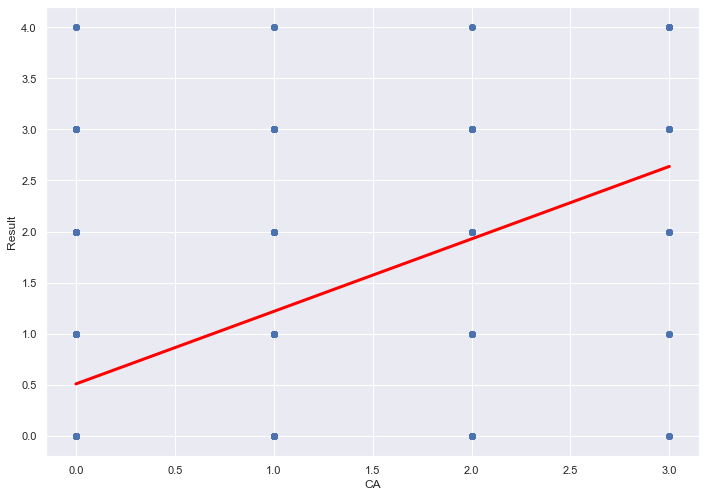

In [10]:
prediction_space = np.linspace(min(X_ca), max(X_ca)).reshape(-1,1)
plt.scatter(X_ca, Y_oc)
plt.plot(prediction_space, lr.predict(prediction_space), color = 'red', linewidth = 3)
plt.ylabel('Result')
plt.xlabel('CA')
plt.show()

In [11]:
X_mlg = heartdisease.drop('result', axis = 1)
Y_mlg = heartdisease['result']

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_mlg, Y_mlg, test_size = 0.2, random_state = 5)
lr = linear_model.LinearRegression()
lr.fit(X_train_1, Y_train_1)

y_pred_1 = lr.predict(X_test_1)
mse = mean_squared_error(Y_test_1, y_pred_1)
r = round(lr.score(X_test_1, Y_test_1), 2)

print("The model performance")
print("-----------------------------")
print("MSE is {}".format(mse))
print("R-squared score is {}".format(r))

The model performance
-----------------------------
MSE is 0.5737656565566976
R-squared score is 0.52


As show through the R-squared score the heatmap is a much better representation of the data than simple linear regression.

#### Part 2

The probabilty distrubution with a beta value of 0.5 is the one that fits linear probabilty distrubution the best as it has the greatest R-squared value.

![alt text](ex6.png "Title")